<h1>
<font color="#ff2e2e">
Corner Detection
</font>
</h1>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

In [3]:
def convolve(matrix, kernel):
    m, n = kernel.shape
    padwidth= kernel.shape[0]//2
    padded_matrix = np.pad(matrix, padwidth, mode='constant')
    x, y = padded_matrix.shape
    output = np.zeros(matrix.shape)
    for i in range(padwidth,x-padwidth):
        for j in range(padwidth,y-padwidth):
            output[i-padwidth, j-padwidth] = np.sum(padded_matrix[i-padwidth:i+padwidth+1, j-padwidth:j+padwidth+1] * kernel)
    return output

<h3><font color = "#079e05"> Complete the harris_points function without using OpenCV functions </font></h3>

In [4]:
def harris_points(image):
    
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''    
    result = image.copy()
    resultgray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    #############
    # Your code #
    #############
    # sobel_x = np.array([[-1, 0, 1],
    #                     [-2, 0, 2],
    #                     [-1, 0, 1]])
    # sobel_y = np.array([[-1, -2, -1],
    #                     [0, 0, 0],
    #                     [1, 2, 1]])
    # ix = convolve(image, sobel_x)
    # iy = convolve(image, sobel_y)
    ix=cv2.Sobel(resultgray,cv2.CV_64F,1,0,ksize=3)
    iy=cv2.Sobel(resultgray,cv2.CV_64F,0,1,ksize=3)
    ix2=cv2.GaussianBlur(ix*ix,(11,11),5)
    # 
    iy2=cv2.GaussianBlur(iy*iy,(11,11),5)
    ixy=cv2.GaussianBlur(ix*iy,(11,11),5)
    
    det =ix2*iy2 - ixy*ixy
    trace=  ix2+iy2
    k=0.04
    r= det-((trace**2)*k)
    padwidth=10
    padded_matrix = np.pad(image, padwidth, mode='constant')
    x, y,_ = padded_matrix.shape
    for i in range(padwidth,x-padwidth):
        for j in range(padwidth,y-padwidth):
            if(r[i-padwidth, j-padwidth]<np.max(padded_matrix[i-padwidth:i+padwidth+1, j-padwidth:j+padwidth+1])):
                r[i-padwidth, j-padwidth] =  0
    
    kernel=np.ones((9,9))
    r=cv2.dilate(r,kernel)
    
    return r

<h3><font color = "#079e05"> Show the result </font></h3>

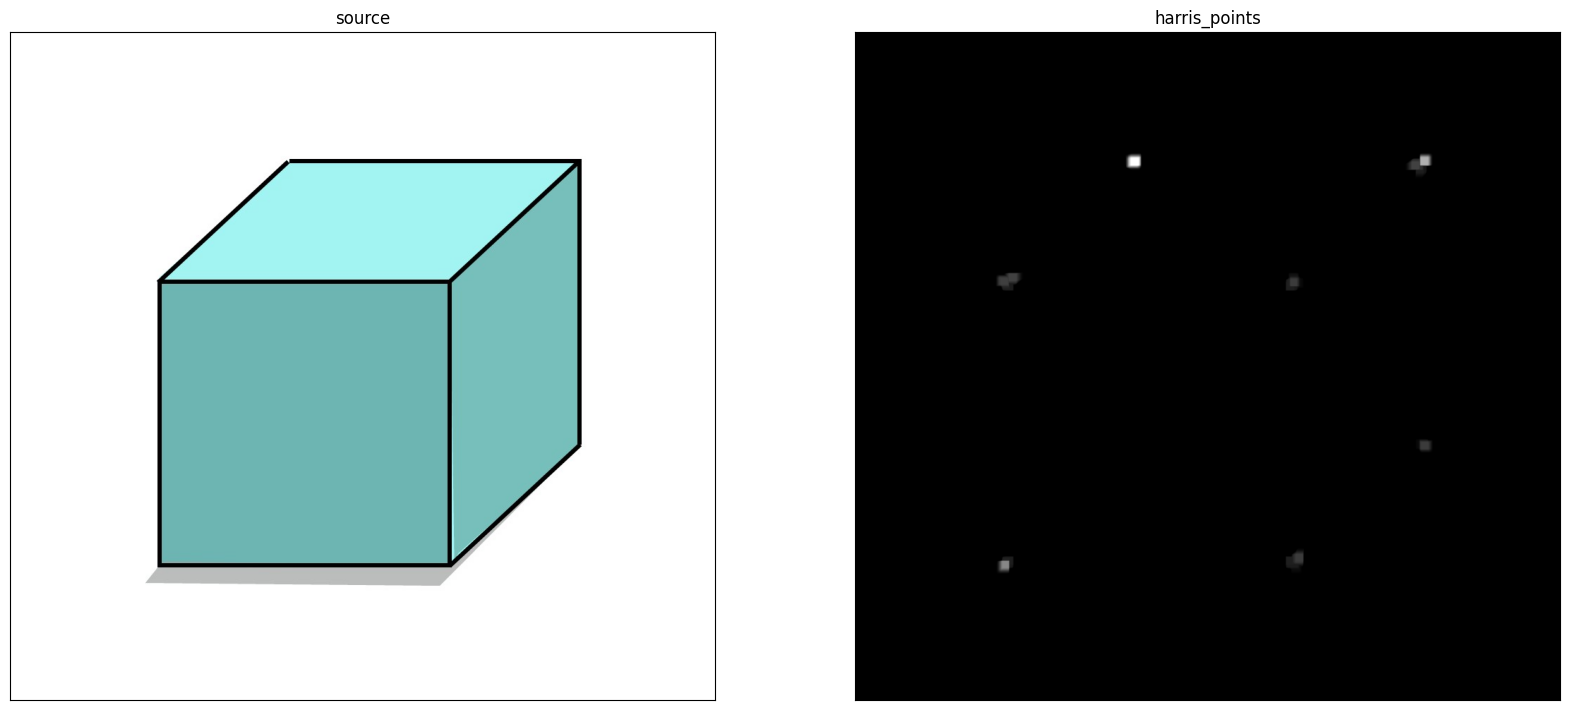

In [5]:
image_list = []
image = cv2.imread(os.path.join('images/Q5', 'harris.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([harris_points(image), 'harris_points', 'img'])
plotter(image_list,1 , 2, True, 20, 10, '7')

<h3><font color = "#079e05"> Complete the harris_points_OpenCV function with using OpenCV functions </font></h3>

In [50]:
def harris_points_OpenCV(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''  
    
    #############
    # Your code #
    #############
    result = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY).copy()
    result= cv2.cornerHarris(result,9,3,k=0.04)
    
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

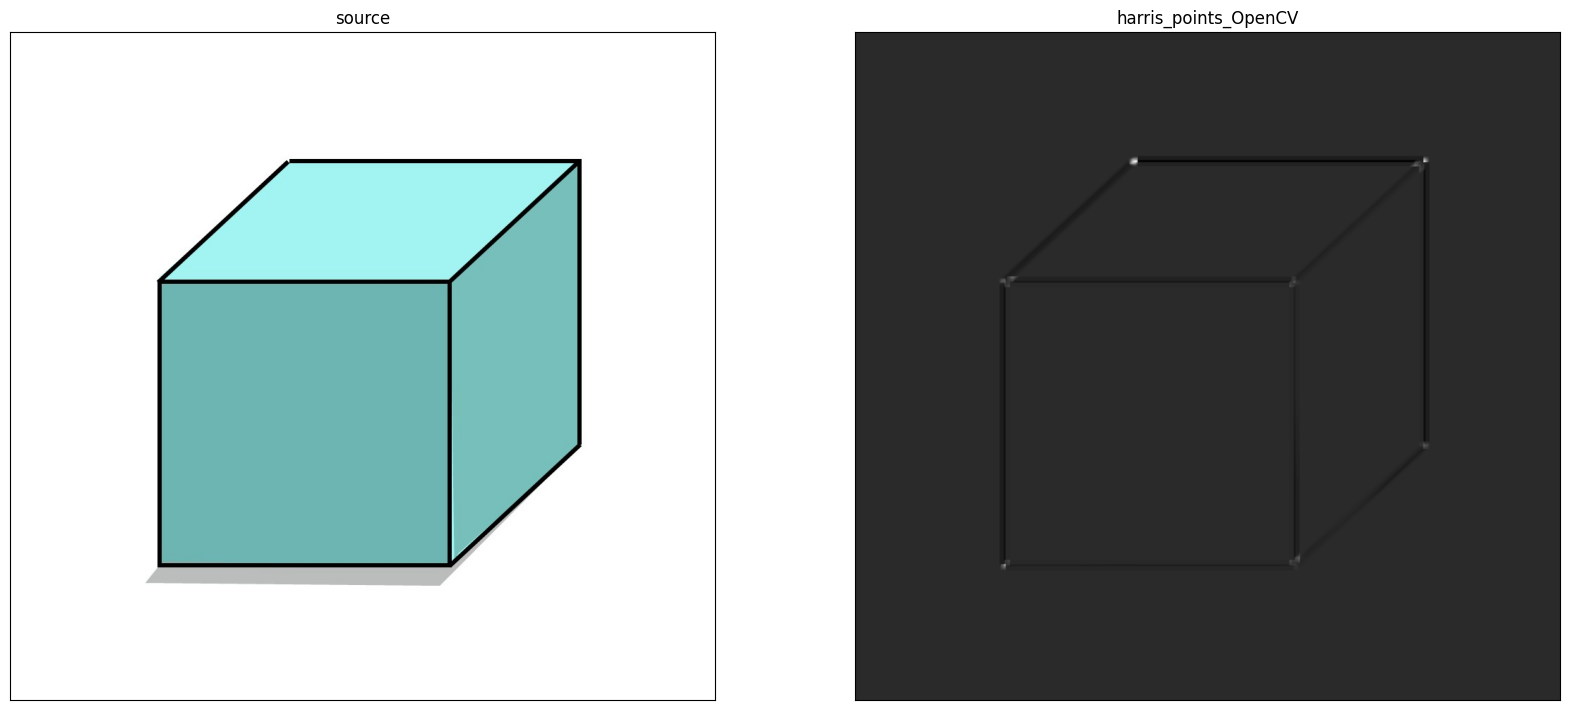

In [51]:
image_list = []
image = cv2.imread(os.path.join('images/Q5', 'harris.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([harris_points_OpenCV(image), 'harris_points_OpenCV', 'img'])
plotter(image_list,1 , 2, True, 20, 10, '7')